# Exploratory Data Analysis

[Stacking Sats Tournament](https://www.hypertrial.ai/stacking-sats)

*Author: Youssef Ahmed*

Shape: (3440, 147)


/var/folders/c4/8gfhfw1n4c1c8v83mcyg2mvh0000gn/T/ipykernel_8554/2339691102.py:10: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(response.text)).rename(columns={"time": "date"})


,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,316781.0,8877.0,1068512.0,3188591.0,877.0,363548.0,1972087.0,61.0,108080.0,7058031.0,...,7.585819e+07,2.716966,1181.005400,0.011701,5.086063,32.718631,0.032358,0.032335,NaN,NaN
2016-01-02,417966.0,8864.0,1071201.0,3167125.0,877.0,363680.0,1980471.0,61.0,108130.0,7043170.0,...,8.238282e+07,1.765765,767.118818,0.006900,2.997635,32.712386,0.032349,0.032359,NaN,NaN
2016-01-03,398443.0,8851.0,1072753.0,3176498.0,876.0,363653.0,1983906.0,61.0,108112.0,7061365.0,...,9.999900e+07,1.845884,793.981305,0.005126,2.204723,32.702898,0.032349,0.032493,NaN,NaN
2016-01-04,413159.0,8853.0,1075846.0,3186226.0,877.0,363689.0,1990669.0,61.0,108143.0,7069295.0,...,1.121030e+08,2.201920,954.420051,0.017405,7.544331,32.692994,0.032338,0.030185,NaN,NaN
2016-01-05,435291.0,8911.0,1075480.0,3189286.0,879.0,363244.0,1990179.0,60.0,108113.0,7079707.0,...,1.452678e+08,2.872012,1242.632112,0.019620,8.489105,32.699202,0.032336,0.030174,NaN,NaN


,missing_count,missing_pct
ReferenceRateETH,3440,100.00
ReferenceRate,3440,100.00
principal_market_price_usd,3440,100.00
ReferenceRateUSD,3440,100.00
ReferenceRateEUR,3440,100.00
principal_market_usd,3440,100.00
CapMrktEstUSD,1268,36.86
AdrBal1in1BCnt,0,0.00
SplyAdrBal1in1K,0,0.00
SplyAdrBal1in100K,0,0.00


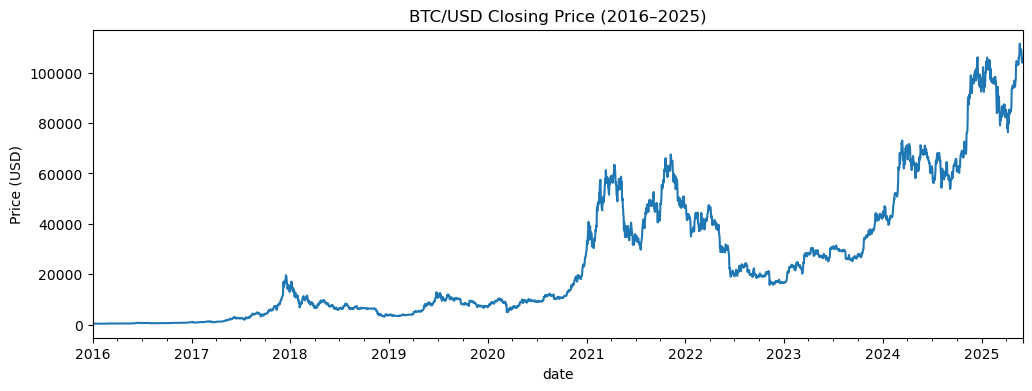

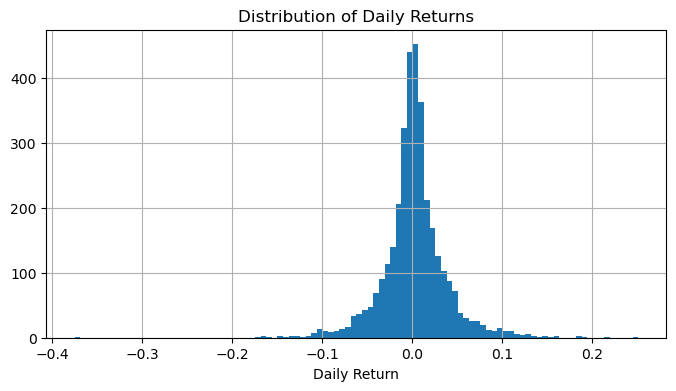

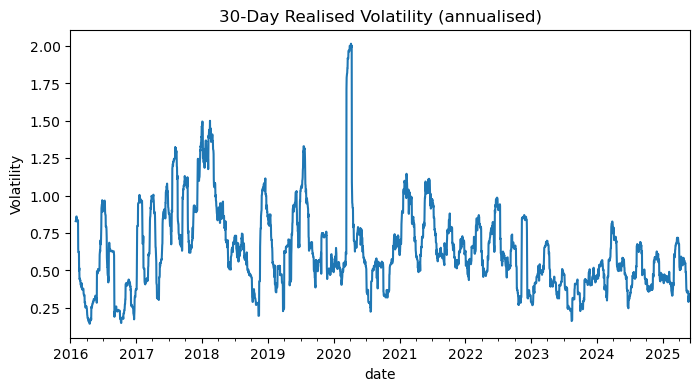

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

# Load data
url = "https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text)).rename(columns={"time": "date"})

# Parse and index
df['date'] = pd.to_datetime(df['date']).dt.normalize().dt.tz_localize(None)
df.set_index('date', inplace=True)

# Restrict to analysis window
df2 = df.loc["2016-01-01":"2025-06-01"]

# Shape and head
print("Shape:", df2.shape)
display(df2.head())

# Missing values (top 10)
missing = df2.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df2) * 100).round(2)
display(pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct}).head(10))


# Plot 1: BTC Closing Price (2013–2025)
plt.figure(figsize=(12, 4))
df2['PriceUSD'].plot(title='BTC/USD Closing Price (2016–2025)')
plt.ylabel('Price (USD)')
plt.show()

# Plot 2: Distribution of Daily Returns
returns = df2['PriceUSD'].pct_change().dropna()
plt.figure(figsize=(8, 4))
returns.hist(bins=100)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

# Plot 3: 30-Day Realised Volatility (annualised)
log_ret = np.log(df2['PriceUSD']).diff()
vol30 = log_ret.rolling(30).std() * np.sqrt(365)
plt.figure(figsize=(8, 4))
vol30.plot(title='30-Day Realised Volatility (annualised)')
plt.ylabel('Volatility')
plt.show()

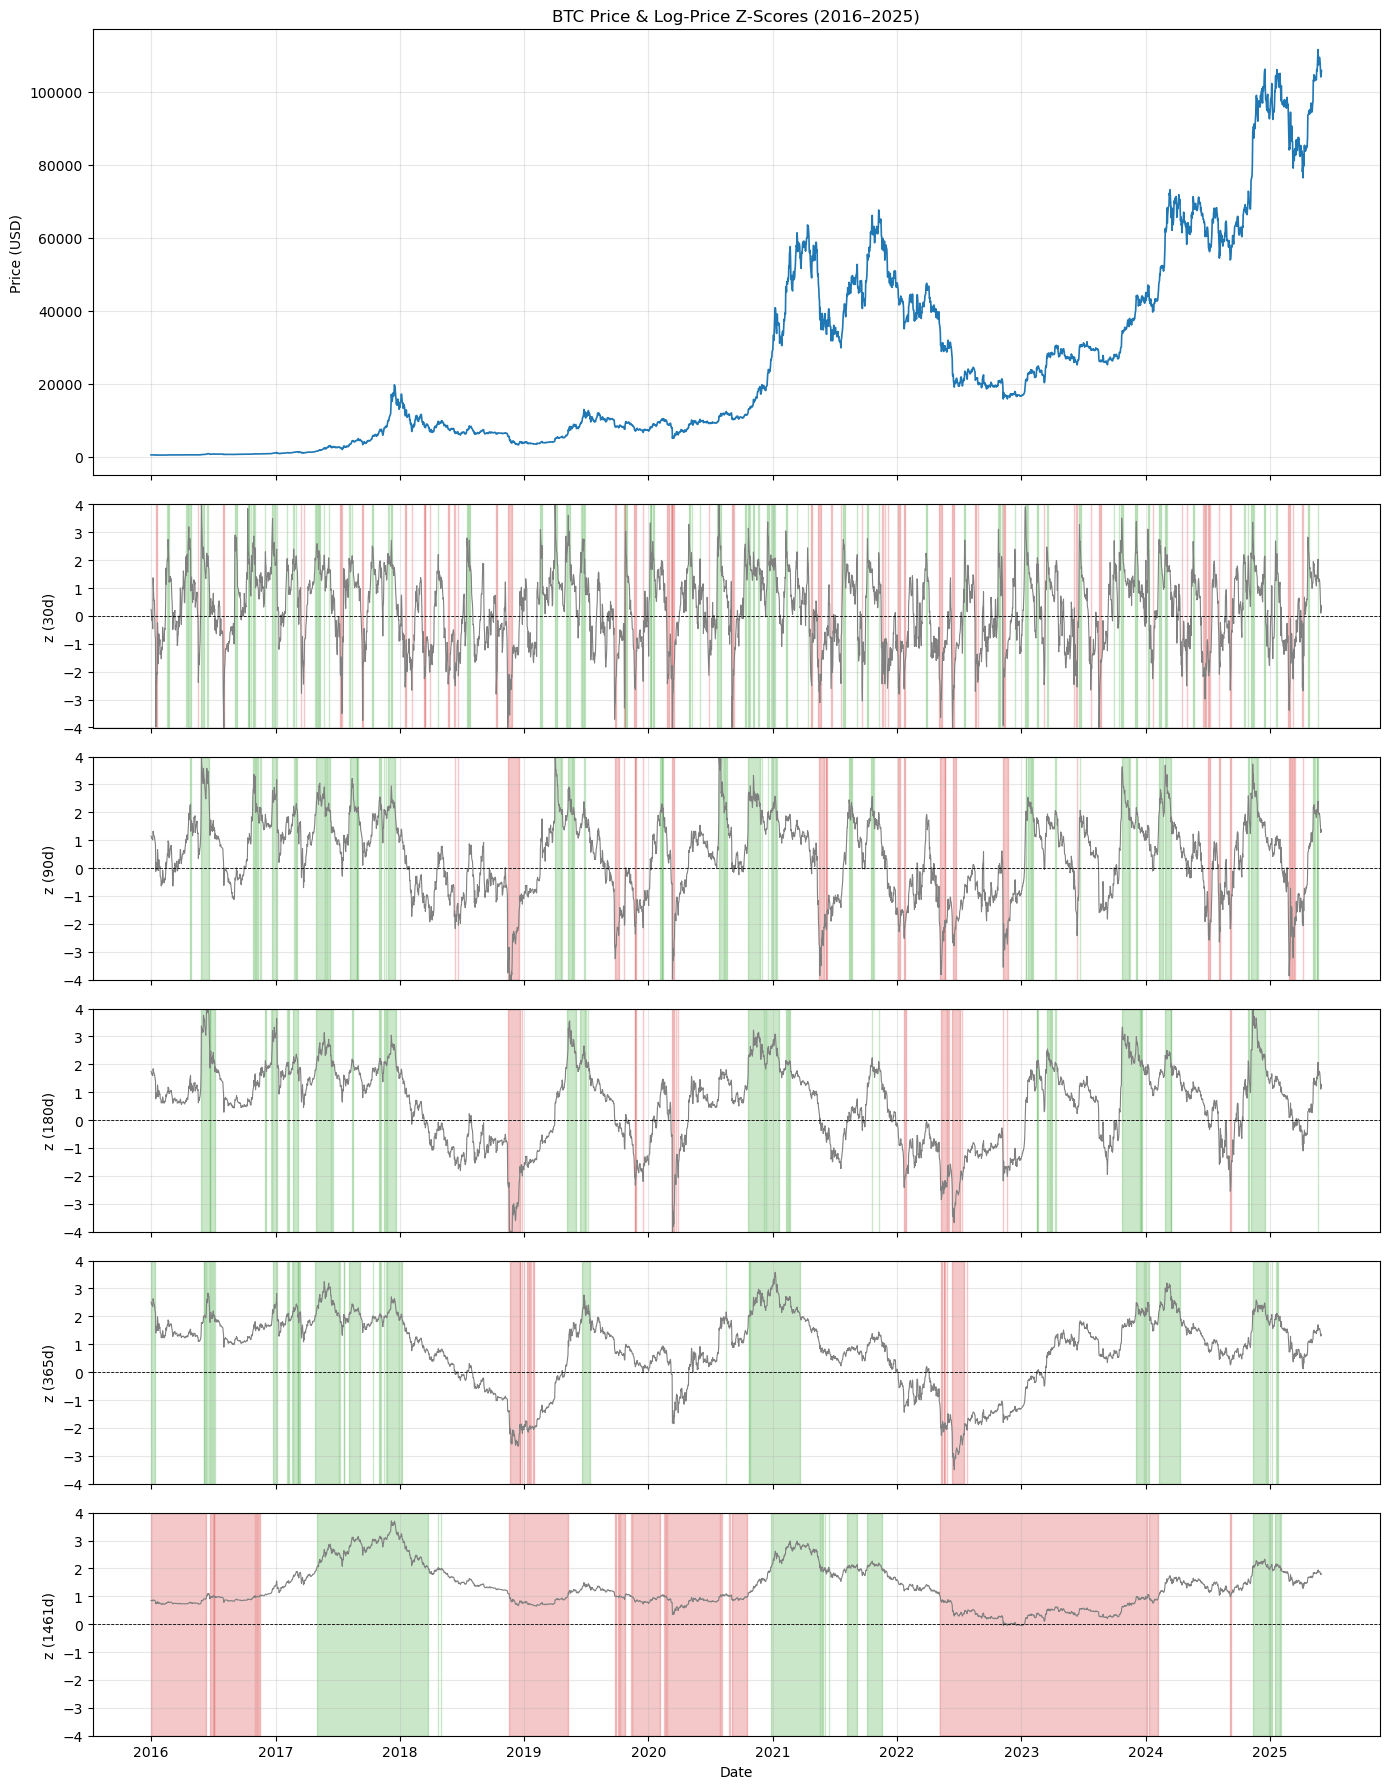

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, BoundaryNorm

# Rolling z-score helper
def rolling_zscore(series: pd.Series, window: int) -> pd.Series:
    """
    Compute a centered rolling z-score over `window` days,
    using min_periods = window // 2.
    """
    m = series.rolling(window, min_periods=window // 2).mean()
    s = series.rolling(window, min_periods=window // 2).std().replace(0, np.nan)
    return ((series - m) / s).fillna(0)


# Prepare full z-score DataFrame
price_full_all    = df["PriceUSD"]
log_price_all     = np.log(price_full_all)
windows           = [30, 90, 180, 365, 1461]

zscore_full = {
    f"z_{w}d": rolling_zscore(log_price_all, w).clip(-4, 4)
    for w in windows
}
z_df_full_all = pd.DataFrame(zscore_full, index=log_price_all.index)

# Define plotting window
START, END = "2016-01-01", "2025-06-01"
price = price_full_all.loc[START:END]
z_df  = z_df_full_all.loc[START:END]

# Single consolidated BTC price + z-scores chart
n_plots = 1 + len(windows)
fig, axes = plt.subplots(
    n_plots, 1, figsize=(14, 3 * n_plots), sharex=True,
    gridspec_kw={"height_ratios": [2] + [1] * len(windows)}
)

# Price subplot
ax0 = axes[0]
ax0.plot(price.index, price.values, lw=1.2)
ax0.set_ylabel("Price (USD)")
ax0.set_title("BTC Price & Log-Price Z-Scores (2016–2025)")
ax0.grid(alpha=0.3)

# Z-score subplots
for i, w in enumerate(windows, start=1):
    ax = axes[i]
    z = z_df[f"z_{w}d"]
    lower, upper = -2.0, 2.0
    if w == 1461:
        lower = 1.0

    ax.fill_between(z.index, -4, 4, where=z <= lower,  color="tab:red",   alpha=0.25)
    ax.fill_between(z.index, -4, 4, where=z >= upper, color="tab:green", alpha=0.25)
    ax.plot(z.index, z.values, lw=0.8, color="grey")
    ax.axhline(0, ls="--", c="k", lw=0.6)
    ax.set_ylabel(f"z ({w}d)")
    ax.set_ylim(-4, 4)
    ax.grid(alpha=0.3)

# X-axis formatting
axes[-1].set_xlabel("Date")
axes[-1].xaxis.set_major_locator(mdates.YearLocator())
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.tight_layout()
plt.show()

/var/folders/c4/8gfhfw1n4c1c8v83mcyg2mvh0000gn/T/ipykernel_8554/75407579.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [d.strftime('%b') for d in pd.date_range('2000-01-01', periods=12, freq='M')]


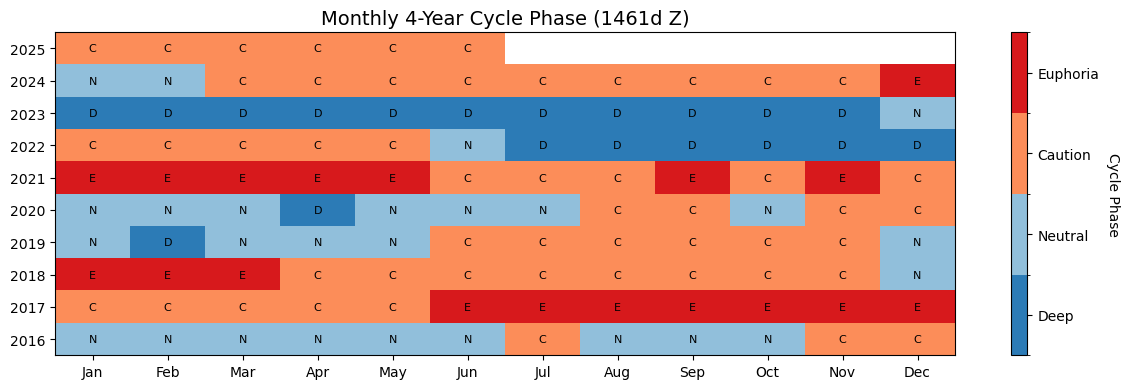

In [3]:
# Classification function for calendar heatmap
phase_labels = {0: 'Deep Accum', 1: 'Neutral', 2: 'Caution', 3: 'Euphoria'}
def classify(z):
    if z < 0.7:   return 0
    if z < 1.0:   return 1
    if z < 2.0:   return 2
    return 3


# Calendar heatmap for 1461-day phase
phase = z_df_full_all["z_1461d"].loc[START:END].map(classify)

cal = pd.DataFrame({"phase": phase})
cal["year"]  = cal.index.year
cal["month"] = cal.index.month
pivot = cal.groupby(["year","month"])["phase"].first().unstack()

cmap = ListedColormap(['#2c7bb6', '#91bfdb', '#fc8d59', '#d7191c'])
norm = BoundaryNorm([0,1,2,3,4], ncolors=cmap.N)

fig, ax = plt.subplots(figsize=(12, 4))
im = ax.imshow(pivot, aspect='auto', origin='lower', cmap=cmap, norm=norm)

# Y-axis: years
ax.set_yticks(np.arange(len(pivot.index)))
ax.set_yticklabels(pivot.index)

# X-axis: month names
ax.set_xticks(np.arange(12))
ax.set_xticklabels(
    [d.strftime('%b') for d in pd.date_range('2000-01-01', periods=12, freq='M')]
)

ax.set_title('Monthly 4-Year Cycle Phase (1461d Z)', fontsize=14)

# Annotate non-NaN cells
for i, year in enumerate(pivot.index):
    for j, month in enumerate(pivot.columns):
        val = pivot.at[year, month]
        if pd.isna(val):
            continue
        code = int(val)
        ax.text(j, i, phase_labels[code][0],
                ha='center', va='center', fontsize=8, color='black')

# Colorbar with centered ticks
cbar = plt.colorbar(im, ax=ax, ticks=[0.5,1.5,2.5,3.5])
cbar.ax.set_yticklabels(['Deep','Neutral','Caution','Euphoria'])
cbar.set_label('Cycle Phase', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

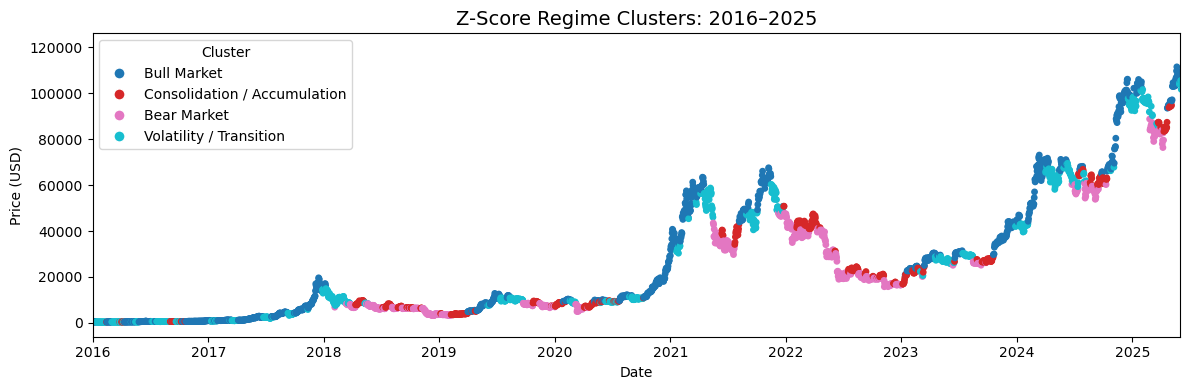

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

# Z-Score Regime Clustering
features = z_df_full_all[['z_30d','z_90d','z_180d','z_365d','z_1461d']].dropna()
kmeans = KMeans(n_clusters=4, random_state=6, n_init=10).fit(features)
labels_k = pd.Series(kmeans.labels_, index=features.index, name='cluster')

# intersect with price index
common_idx   = features.index.intersection(price_full_all.index)
labels_k     = labels_k.loc[common_idx]
price_common = price_full_all.loc[common_idx]

# Single full-range plot
fig, ax = plt.subplots(figsize=(12, 4))
scatter = ax.scatter(
    price_common.index,
    price_common,
    c=labels_k,
    cmap='tab10',
    s=15
)

# title & axes
ax.set_title('Z-Score Regime Clusters: 2016–2025', fontsize=14)
ax.set_ylabel('Price (USD)')
ax.set_xlabel('Date')
ax.set_xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2025-06-01'))

# legend
cluster_labels = {
    0: 'Bull Market',
    1: 'Consolidation / Accumulation',
    2: 'Bear Market',
    3: 'Volatility / Transition' 
}

colors = [scatter.cmap(scatter.norm(i)) for i in sorted(cluster_labels)]
handles = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=colors[i], markersize=8,
           label=cluster_labels[i])
    for i in sorted(cluster_labels)
]
ax.legend(handles=handles, title='Cluster')

# yearly ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()